In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('PETR4.SA.csv', delimiter=',', index_col='Date',parse_dates=True)

In [3]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-14,29.170000,29.670000,28.719999,29.450001,23.936726,50745400
2021-01-15,29.049999,29.080000,28.030001,28.120001,22.855711,80673300
2021-01-18,28.309999,28.850000,28.010000,28.070000,22.815071,68855700
2021-01-19,28.480000,28.860001,27.639999,28.690001,23.319004,61656000
2021-01-20,28.950001,29.120001,28.110001,28.209999,22.928862,60306200
2021-01-21,28.020000,28.400000,27.510000,27.549999,22.392420,41284900
2021-01-22,26.930000,27.240000,26.559999,27.090000,22.018536,51181900
2021-01-26,27.250000,27.969999,26.820000,27.000000,21.945385,64514600
2021-01-27,26.809999,28.170000,26.530001,27.400000,22.270500,68337800


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,26.870040,27.274080,26.449320,26.858320,23.319959,7.815904e+07
std,2.189436,2.180545,2.210378,2.208127,2.980622,4.487832e+07
min,21.299999,21.889999,20.480000,21.100000,17.149912,6.821400e+06
25%,25.802499,26.190000,25.375000,25.585000,21.831224,5.296272e+07
50%,27.335000,27.770001,26.830000,27.280000,23.438604,6.814975e+07
75%,28.690001,29.067500,28.207500,28.660000,24.542375,8.843385e+07
max,31.400001,31.810000,31.259999,31.500001,30.360001,4.902304e+08


<AxesSubplot:xlabel='Date'>

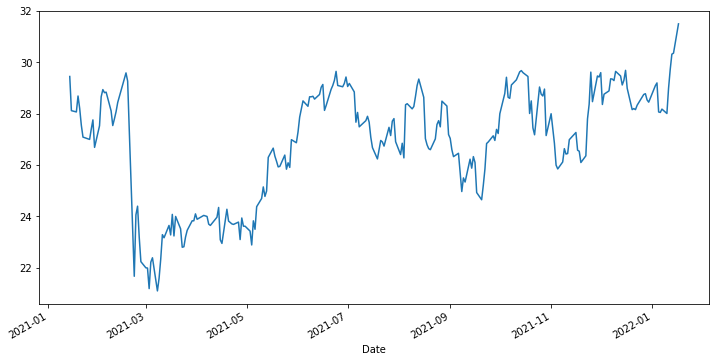

In [5]:
df['Close'].plot(figsize=(12,6))

In [55]:
from sklearn.model_selection import train_test_split

train = df['Close'].iloc[:200]
test = df['Close'].iloc[200:]

# train, test = train_test_split(df['Close'], test_size=0.33, shuffle=False)

train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [57]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [58]:
scaled_train[:10]

array([[0.97319359],
       [0.81818193],
       [0.81235431],
       [0.8846155 ],
       [0.82867121],
       [0.75174814],
       [0.6981352 ],
       [0.68764569],
       [0.73426573],
       [0.77622378]])

In [59]:
from keras.preprocessing.sequence import TimeseriesGenerator

# define generator
n_input = 3
n_features = 1
n_batch_size = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=n_batch_size)

In [60]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.97319359 0.81818193 0.81235431]
Predict this y: 
 [[0.8846155]]


In [61]:
X.shape

(1, 3, 1)

In [62]:
# We do the same thing, but now instead for 12 days
n_input = 12
n_batch_size = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=n_batch_size)

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras import optimizers

In [64]:
# define model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(n_input, n_features), name='layer1'))
model.add(Dense(1, name='layer2'))
model.compile(optimizer="adam", loss='mse', metrics=["accuracy"])

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (LSTM)               (None, 128)               66560     
                                                                 
 layer2 (Dense)              (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [66]:
#fit the model
n_epochs = 50
n_batch_size = 3
verbose = 1

model.fit(generator, epochs=n_epochs, verbose=verbose)

Epoch 1/50
188/188 [==============================] - 2s 5ms/step - loss: 0.0328 - accuracy: 0.0106
Epoch 2/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0208 - accuracy: 0.0106
Epoch 3/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0178 - accuracy: 0.0106
Epoch 4/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0157 - accuracy: 0.0106
Epoch 5/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0134 - accuracy: 0.0106
Epoch 6/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0133 - accuracy: 0.0106
Epoch 7/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0130 - accuracy: 0.0106
Epoch 8/50
188/188 [==============================] - 1s 3ms/step - loss: 0.0120 - accuracy: 0.0106
Epoch 9/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0116 - accuracy: 0.0106
Epoch 10/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0114 - accuracy: 0.0106

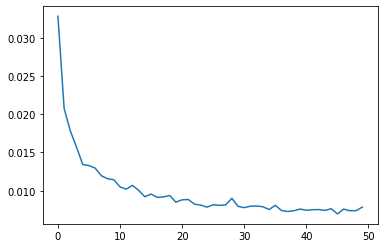

In [67]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [87]:
last_train_batch = scaled_train[-n_input:]

In [88]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [89]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 21ms/step


array([[0.66119087]], dtype=float32)

In [90]:
scaled_test[0:6]

array([[0.57109557],
       [0.55361305],
       [0.5850817 ],
       [0.64568753],
       [0.62121212],
       [0.62354324]])

In [91]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 20ms/step


In [92]:
test_predictions[:10]

[array([0.66119087], dtype=float32),
 array([0.66929364], dtype=float32),
 array([0.6862232], dtype=float32),
 array([0.70556647], dtype=float32),
 array([0.72395456], dtype=float32),
 array([0.73926854], dtype=float32),
 array([0.7518844], dtype=float32),
 array([0.7618761], dtype=float32),
 array([0.7694566], dtype=float32),
 array([0.77575874], dtype=float32)]

In [93]:
test.head()

,Close,Close Pred,Prediction
Date,,,
2021-11-04,26.000000,26.773018,26.773018
2021-11-05,25.850000,26.842539,26.842539
2021-11-08,26.120001,26.987795,26.987795
2021-11-09,26.639999,27.153760,27.153760
2021-11-10,26.430000,27.311530,27.311530


In [94]:
true_predictions = scaler.inverse_transform(test_predictions)

In [95]:
test['Prediction'] = true_predictions

<AxesSubplot:xlabel='Date'>

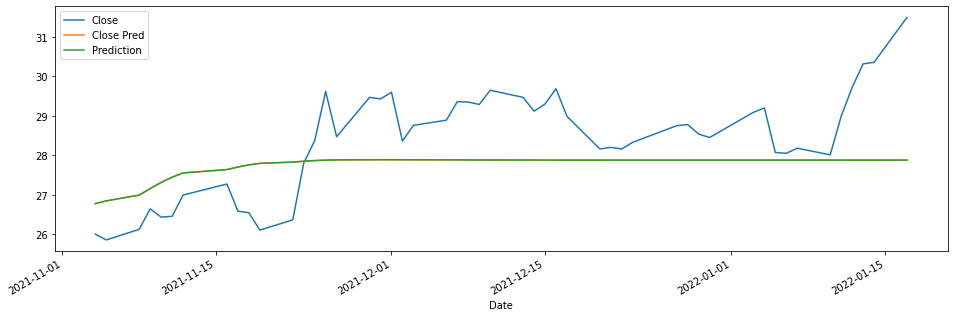

In [96]:
test.plot(figsize=(16,5))

In [97]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['Close'],test['Prediction']))
rmse

1.2825204781796042